In [1]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/dtsarev/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Произведем анализ train набора данных

In [2]:
sns.set_theme(style="whitegrid")

In [3]:
LABELS_JSON = "/home/dtsarev/master_of_cv/sem3/DL_project/data/splits_final_deblurred/train/labels.json"

In [4]:
with open(LABELS_JSON, "r") as f:
    data = json.load(f)

In [5]:
images = data["images"]
annotations = data.get("annotations", [])
categories = data["categories"]

In [6]:
# Словарь для id -> название категории
cat_id_to_name = {cat["id"]: cat["name"] for cat in categories}

In [7]:
# DataFrame для изображений и аннотаций
df_images = pd.DataFrame(images)
df_anns = pd.DataFrame(annotations)

In [8]:
df_images

,id,file_name,height,width,license,coco_url
0,0,01_frame_001160.PNG,1080,1920,None,None
1,1,01_frame_001170.PNG,1080,1920,None,None
2,2,01_frame_001180.PNG,1080,1920,None,None
3,3,01_frame_001190.PNG,1080,1920,None,None
4,4,01_frame_001200.PNG,1080,1920,None,None
...,...,...,...,...,...,...
2997,2997,12_frame_001960.PNG,1080,1920,None,None
2998,2998,12_frame_001970.PNG,1080,1920,None,None
2999,2999,12_frame_001980.PNG,1080,1920,None,None
3000,3000,12_frame_001990.PNG,1080,1920,None,None


In [9]:
df_anns

,id,image_id,category_id,bbox,segmentation,area,iscrowd
0,0,0,2,"[1614.1, 431.9, 305.9, 385.3]","[[1731.0, 816.5, 1703.0, 814.5, 1671.0, 777.5,...",54527.0,0
1,1,0,2,"[1502.1, 448.2, 287.6, 285.4]","[[1647.0, 731.5, 1633.0, 725.5, 1609.5, 709.0,...",41007.0,0
2,2,0,2,"[1484.5, 192.0, 320.5, 352.1]","[[1588.0, 543.5, 1552.5, 498.0, 1510.5, 436.0,...",58075.0,0
3,3,0,3,"[137.5, 122.7, 160.6, 118.2]","[[273.0, 239.5, 226.0, 234.5, 205.0, 221.5, 17...",10828.0,0
4,4,1,2,"[1742.0, 544.6, 178.0, 275.5]","[[1856.0, 819.5, 1835.0, 812.5, 1803.0, 790.5,...",23653.0,0
...,...,...,...,...,...,...,...
17997,17997,3000,2,"[1715.7, 701.5, 98.0, 126.6]","[[1803.0, 827.5, 1772.0, 820.5, 1728.5, 790.0,...",6035.0,0
17998,17998,3000,2,"[816.1, 367.4, 515.9, 400.8]","[[977.0, 767.5, 948.5, 741.0, 936.0, 722.5, 91...",136712.0,0
17999,17999,3001,2,"[1806.0, 348.6, 113.2, 136.1]","[[1918.0, 482.5, 1817.0, 448.5, 1804.5, 427.0,...",8701.0,0
18000,18000,3001,2,"[1550.0, 428.7, 369.2, 199.1]","[[1550.0, 626.5, 1578.0, 496.5, 1607.0, 551.5,...",24237.0,0


In [10]:
num_images = len(df_images)
print("Всего изображений:", num_images)

Всего изображений: 3002


In [11]:
print("Примеры изображений:")
print(df_images.head())

Примеры изображений:
   id            file_name  height  width license coco_url
0   0  01_frame_001160.PNG    1080   1920    None     None
1   1  01_frame_001170.PNG    1080   1920    None     None
2   2  01_frame_001180.PNG    1080   1920    None     None
3   3  01_frame_001190.PNG    1080   1920    None     None
4   4  01_frame_001200.PNG    1080   1920    None     None


In [12]:
df_images.height.unique()

array([1080])

In [13]:
df_images.width.unique()

array([1920])

Как можно видеть, все изображения одног размера: 1920x1080

In [14]:
# Сколько категорий (типов объектов)?
num_categories = len(categories)
print("Всего типов объектов (категорий):", num_categories)
print("Список категорий:", [cat["name"] for cat in categories])

Всего типов объектов (категорий): 4
Список категорий: ['rigid_plastic', 'cardboard', 'metal', 'soft_plastic']


In [15]:
# Анализ аннотаций: сколько всего объектов
num_objects = len(df_anns)
print("Всего объектов (аннотаций):", num_objects)

Всего объектов (аннотаций): 18002



Число объектов по категориям:
category_name
cardboard        11941
soft_plastic      4672
rigid_plastic     1130
metal              259
Name: count, dtype: int64


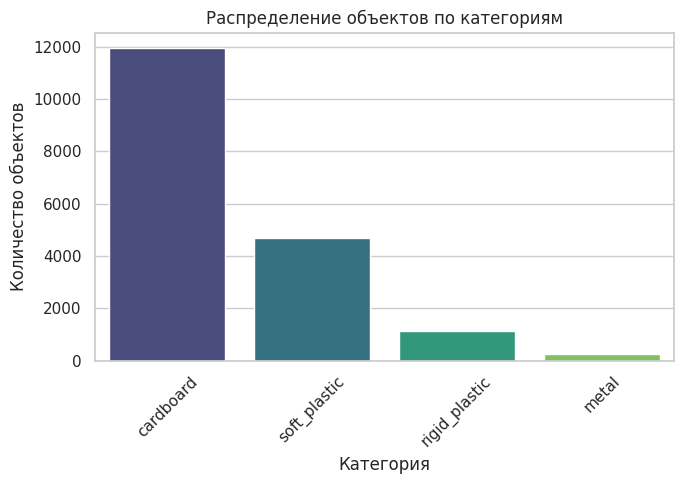

In [16]:
# Сколько объектов каждого типа?
# Предполагаем, что в df_anns есть "category_id"
df_anns["category_name"] = df_anns["category_id"].map(cat_id_to_name)

counts_by_cat = df_anns["category_name"].value_counts()
print("\nЧисло объектов по категориям:")
print(counts_by_cat)

plt.figure(figsize=(7,5))
sns.barplot(x=counts_by_cat.index, y=counts_by_cat.values, palette="viridis")
plt.title("Распределение объектов по категориям")
plt.xlabel("Категория")
plt.ylabel("Количество объектов")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

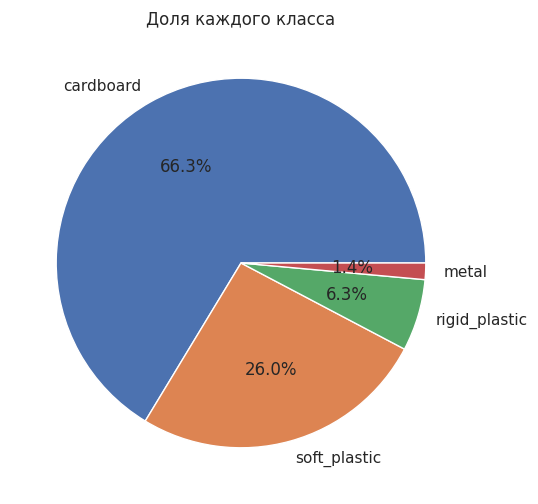

In [17]:
plt.figure(figsize=(6,6))
plt.pie(counts_by_cat.values, labels=counts_by_cat.index, autopct="%.1f%%")
plt.title("Доля каждого класса")
plt.show()

Датасет имеет сильный дисбаланс классов

/home/dtsarev/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


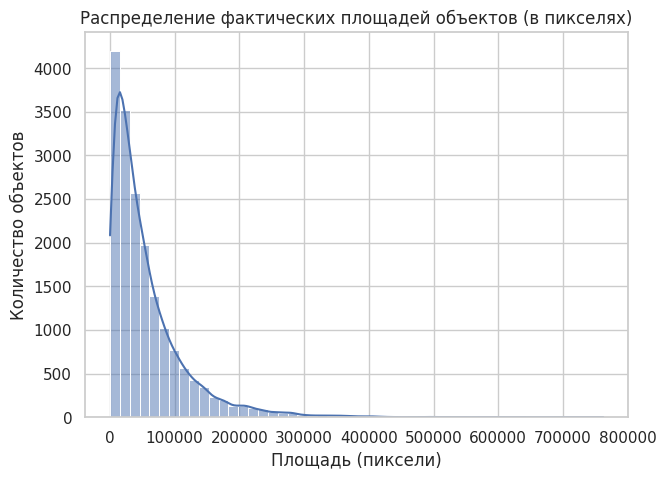

In [18]:
plt.figure(figsize=(7,5))
sns.histplot(df_anns["area"], bins=50, kde=True)
plt.title("Распределение фактических площадей объектов (в пикселях)")
plt.xlabel("Площадь (пиксели)")
plt.ylabel("Количество объектов")
plt.show()


Средняя площадь (area) по категориям:
category_name
metal            22180.173745
rigid_plastic    34753.793805
cardboard        54106.392011
soft_plastic     69017.586901
Name: area, dtype: float64


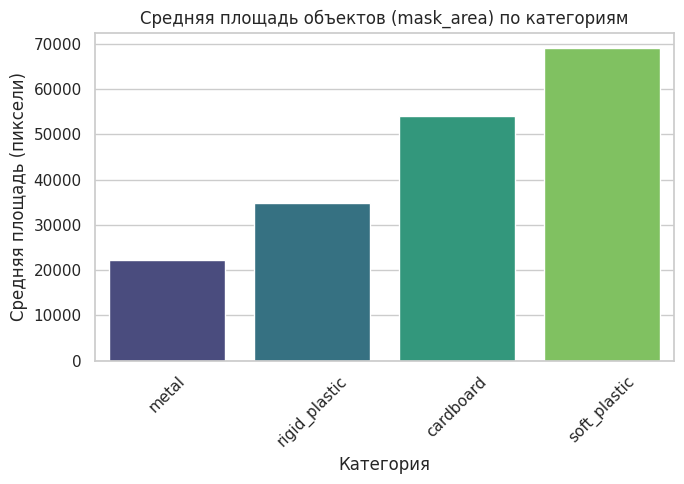

In [19]:
cat_areas = df_anns.groupby("category_name")["area"].mean().sort_values()
print("\nСредняя площадь (area) по категориям:")
print(cat_areas)

plt.figure(figsize=(7,5))
sns.barplot(x=cat_areas.index, y=cat_areas.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Средняя площадь объектов (mask_area) по категориям")
plt.xlabel("Категория")
plt.ylabel("Средняя площадь (пиксели)")
plt.tight_layout()
plt.show()

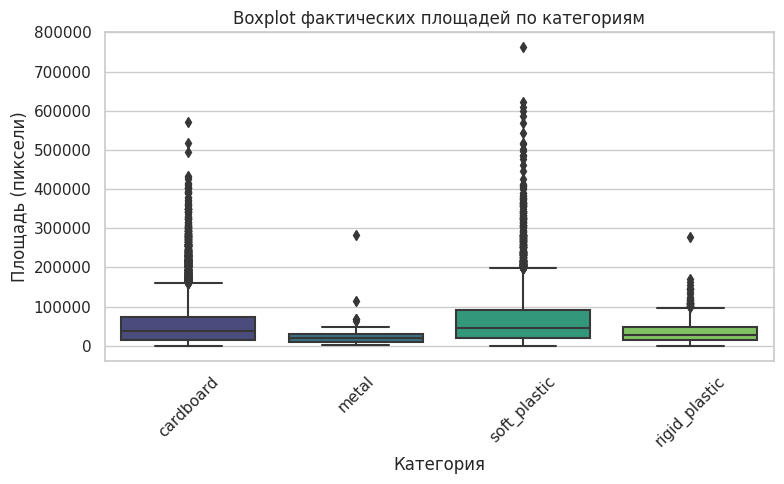

In [20]:
# Также boxplot, чтобы увидеть разброс
plt.figure(figsize=(8,5))
sns.boxplot(data=df_anns, x="category_name", y="area", palette="viridis")
plt.title("Boxplot фактических площадей по категориям")
plt.xlabel("Категория")
plt.ylabel("Площадь (пиксели)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Средняя площадь по клкассам отличается довльно занчительно (приверно в 3 раза между soft_plastic и metal)